## Loading of trARPES data as collected using the Phoibos detector at FHI Berlin.
### Analysis of CrSBr by Lawson Lloyd. 2024.

First, the SpecsScan class is imported which has the scan loader as its class method.

In [2]:
from specsscan import SpecsScan
from pathlib import Path
import numpy as np
import matplotlib.colors as col
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive
import os
import dill

ModuleNotFoundError: No module named 'pynxtools'

Here, a SpecsScan class instance is created as per the configuration provided in [config.yaml](../tests/data/config.yaml). The user may set the entries in config.yaml file, for example, the data path and conversion parameters as per the requirements before creating this instance

### The path may changed to point to the scan folder of the data of interest (for example, on a server drive)

In [3]:
#sps = SpecsScan(config="../tests/data/config.yaml")
sps = SpecsScan(config="../tutorial/config.yaml")
#path = "../tests/data/" # Path to the test data set

FileNotFoundError: could not find the configuration file: ../tutorial/config.yaml

The load_scan method loads the scan as an xarray along with the metadata needed for nexus conversion. The progress bars can be activated by changing the config parameter, enable_nested_progress_bar, to true in config.yaml 

In [289]:
#Load in your scan files...

fns = np.array([ 9170, 9219, 9217, 9218, 9216, 9220, 9228]) #scans
fns = [9170]
fns = [9411, 9410, 9408, 9409, 9400, 9370, 9367]
fns = [9137, 9517, 9216]
for i in range(0,len(fns)):
    vars()[str('res_'+str(fns[i]))]  = sps.load_scan(
        scan = int(fns[i]), # Scan number
        #iterations = 0
    )
    res_loaded = vars()[str('res_'+str(fns[i]))]
    
print('You have loaded '+str(len(fns))+' files!')


Scan path not provided, searching directories...
Scan found at path: /Volumes/topfloor/trARPES/PESData/2024/2024_04/2024_04_10/Raw Data/9137


  0%|          | 0/166 [00:00<?, ?it/s]

Done!
Scan path not provided, searching directories...
Scan found at path: /Volumes/topfloor/trARPES/PESData/2024/2024_04/2024_04_29/Raw Data/9517


  0%|          | 0/58 [00:00<?, ?it/s]

Done!
Scan path not provided, searching directories...
Scan found at path: /Volumes/topfloor/trARPES/PESData/2024/2024_04/2024_04_17/Raw Data/9216


  0%|          | 0/76 [00:00<?, ?it/s]

Done!
You have loaded 3 files!


In [293]:
scans = np.array([ 9219, 9217, 9218, 9216, 9220, 9228]) #scans
trans = np.array([1.6, 4, 8, 12.5,  15.9, 20])     #transmission in %

scans = [9216, 9370, 9408, 9517]
percents = [12, 12, 12, 12]
wavelength = [910, 700, 640, 400]

max_power = 900 #mW
power = trans/100*max_p    #power
print(power)

[ 14.4  36.   72.  112.5 143.1 180. ]


In [291]:
# Provide Scan information regarding pump power/fluence, wavelength, and temperature
# This is a dictionary for scans taken Spring2024

scans_Info = {}

scans = [9170, 9176, 9180, 9183, 9184, 9207, 9208, 9185, 9216, 9217, 9218, 9219, 9220, 9227, 9228, 9229, 9230, 9231, 9232, 9237, 9240, 9241]
percents = [8, 12.6, 4, 2, 1, 0.5, 0.25, 8, 12.5, 4, 8, 1.5, 15.85, 1, 20, 20, 4, 30, 12, 12.5, 20, 4]

fw_mw = [p*0.01*max_power for p in percents]

print(percents)
print(fw_mw)

[8, 12.6, 4, 2, 1, 0.5, 0.25, 8, 12.5, 4, 8, 1.5, 15.85, 1, 20, 20, 4, 30, 12, 12.5, 20, 4]
[72.0, 113.4, 36.0, 18.0, 9.0, 4.5, 2.25, 72.0, 112.5, 36.0, 72.0, 13.5, 142.65, 9.0, 180.0, 180.0, 36.0, 270.0, 108.0, 112.5, 180.0, 36.0]


In [46]:
scans_lowT = [9237, 9240, 9241]

In [22]:
scans_935nm = []
scans_910nm = []
scans_800nm = []
scans_700nm = []
scans_400nm = []

scans_

scans_delay_shift = [9170, 9176, 9180, 9183, 9184]


In [294]:
for s in range(0,len(scans)):
    if scans[s] in scans_lowT:
        temp = 126
    else:
        temp = 300
            
    scans_Info.update({scans[s]:[wavelength[s], fw_mw[s], temp]})

In [295]:
scans_Info

{9170: [910, 72.0, 300],
 9176: [700, 113.4, 300],
 9180: [640, 36.0, 300],
 9183: [400, 18.0, 300],
 9216: [910, 72.0, 300],
 9370: [700, 113.4, 300],
 9408: [640, 36.0, 300],
 9517: [400, 18.0, 300]}

In [80]:
from scipy.integrate import solve_ivp

tau0 = 500000
tau01 = 30
tau1 = 300
tau10 = 100
t0 = 50
fwhm = 20

def five_level_system(t, n, t0, fwhm, gamma0, gamma01, gamma1, gamma10):
    
    Nx_prime = F(d) - NX/tau_x - Nx/tau_decay_x
    Ncb_prime = +Nx/tau_x - Ncb/tau_decay_CB
    
    #n0_prime = -(gamma01 + gamma0)*n[0] + gamma10*n[1] + np.exp(-(t-t0)**2/(np.sqrt(2)*fwhm/2.3548200)**2)/(fwhm/2.3548200*np.sqrt(2*np.pi))
    #n1_prime = -gamma1*n[1] + gamma01*n[0] - gamma10*n[1]
    return [n0_prime, n1_prime]
params = (t0, fwhm, 1/tau0, 1/tau01, 1/tau1, 1/tau10)
n0 = [0, 0]

res = solve_ivp(five_level_system, (0, 200), t_eval=np.linspace(0, 2000, 1000), y0=n0, args = params)

NameError: name 'F' is not defined

In [ ]:
def ode_resolution(t, t0, fwhm, gamma0, gamma01, gamma1, gamma10):
    n0 = [0, 0]
    res = solve_ivp(five_level_system, t_span = (t[0], t[-1]), t_eval=t, y0=n0, args = (t0, fwhm, gamma0, gamma01, gamma1, gamma10))
    ret = np.asarray([res.y[0]/ res.y[0].max(), res.y[1]/ res.y[1].max()])
    return ret

In [ ]:
params = {"t0":0, "fwhm":30, "gamma0":1/tau0, "gamma01":1/tau01, "gamma1":1/tau1, "gamma10":1/tau10}
res = ode_resolution(k_points.delay, **params)
plt.plot(k_points.delay, res.T)
(k_points/k_points.max()).plot()
(s_points/s_points.max()).plot()

In [ ]:
def objective(params, x, data, sigma):
    """Calculate total residual for fits"""
    res = ode_resolution(x, **params)
    # make residual per data set
    resid = (data - res)/sigma

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [ ]:
objective(params, k_points.delay, [k_points/k_points.max(), s_points/s_points.max()], [np.ones_like(k_points), np.ones_like(s_points)])

In [ ]:
from lmfit import Parameters, minimize, report_fit

fit_params = Parameters()
fit_params.add("t0", value=0, min=-30, max=30, vary=True)
fit_params.add("fwhm", value=100, min=10, max=150, vary=True)
fit_params.add("gamma0", value=1/100000, min=0, max=0.1, vary=False)
fit_params.add("gamma01", value=1/tau01, min=0, max=0.1, vary=True)
fit_params.add("gamma1", value=1/tau1, min=0, max=0.1, vary=True)
fit_params.add("gamma10", value=1/tau10, min=0, max=0.1, vary=True)
fit_params

In [ ]:
t = k_points.delay
data = np.asarray([k_points/k_points.max(), s_points/s_points.max()])
sigma = np.asarray([np.sqrt(k_points)/k_points.max(), np.sqrt(s_points)/s_points.max()])*.1

out = minimize(objective, fit_params, args=(t, data, sigma))
report_fit(out)

In [ ]:
res = ode_resolution(k_points.delay, **out.params)
plt.plot(t, res.T)
plt.errorbar(t, data[0], sigma[0])
plt.errorbar(t, data[1], sigma[1])

In [ ]:
1/out.params["gamma01"]

In [268]:
len(scans)

6

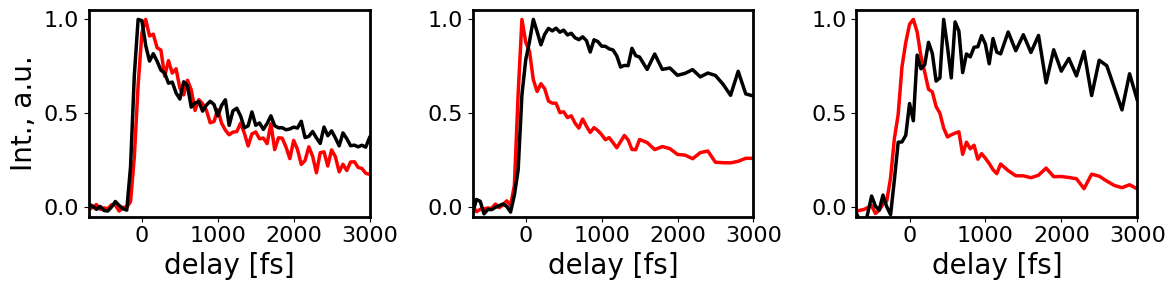

In [307]:
delay_limit, delay_limit_neg = 3000, -700
cmap_max = 0.012

scans = [9216, 9370, 9517]

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range
a, aint, a_full = [-12, 15], 20, [-11, 15]

fig, axx = plt.subplots(1,len(scans))
fig.set_size_inches(12, 3, forward=False)
axx = axx.flatten()

cn = 100
colors = plt.cm.Reds(np.linspace(.25, 1, cn))
cm = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.Reds)

colors2 = plt.cm.bone_r(np.linspace(0.25, 1, cn)) 
cm2 = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.bone_r)

fluence_cbar = np.linspace(power[0], power[-1], cn)
counter = 0 
for s in np.arange(0,len(scans)):  #loop over the scans and the fluence simultaniously
    res_to_plot = vars()[str('res_'+str(scans[s]))]
     ### Calculating traces ###
    trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-600,-250)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-600,-250)))
    
    trace_1 = trace_1/np.max(trace_1)
    trace_2 = trace_2/np.max(trace_2)
    
    I1 = trace_1.values
    t1 = trace_1.coords['delay'].values
    I2 = trace_2.values
    t2 = trace_2.coords['delay'].values
    
    j_fluence = (np.abs(fluence_cbar-power[s])).argmin()

    #im = axx[counter].plot(t1,I1, color = colors[j_fluence])
    im = axx[counter].plot(t1,I1, color = 'red')
    #axx[s].set_title('Higher')
    axx[counter].set_xlabel('delay [fs]')
    #axx[0].legend(frameon = False,loc='best', fontsize = 12)

    #axx[counter].plot(t2,I2, color = colors2[j_fluence])
    axx[counter].plot(t2,I2, color = 'black')
    axx[counter].set_xlim([-700,3000])
    axx[counter].set_ylim([-0.05,1.05])

    #axx[0].set_title()
    #axx[0].set_xlabel('delay [fs]')
    #axx[1].legend(frameon = False,loc='best', fontsize = 12)    
    counter = counter + 1

###

axx[1].set_xlim([-700,3000])
axx[0].set_ylabel('Int., a.u.')
#cbar = plt.colorbar(cm, ax=axx[0])
#cbar.set_label('Fluence', rotation=90, fontsize=22)
#cbar.ax.tick_params(labelsize=20)

#cbar = plt.colorbar(cm2, ax=axx[1])
#cbar.set_label('Fluence', rotation=90, fontsize=22)
#cbar.ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()        


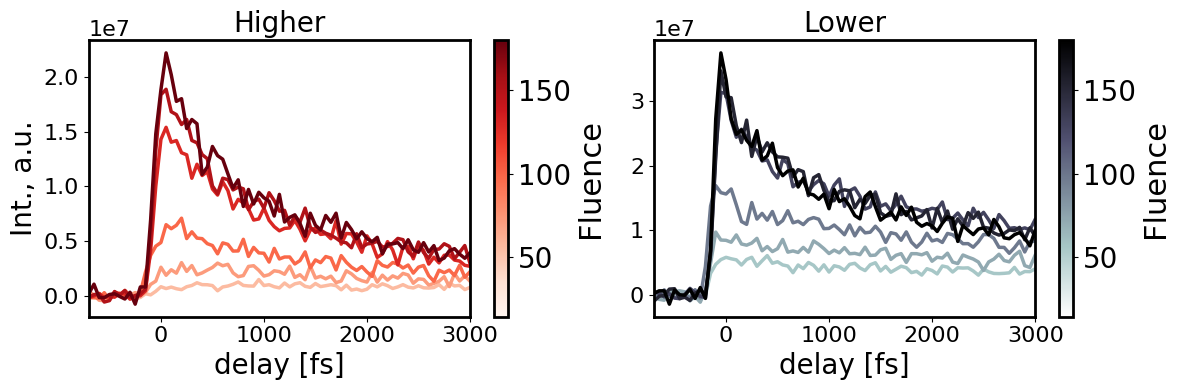

In [261]:
delay_limit, delay_limit_neg = 3000, -700
cmap_max = 0.012

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range
a, aint, a_full = [-12, 15], 20, [-11, 15]

fig, axx = plt.subplots(1,2)
fig.set_size_inches(12, 4, forward=False)
axx = axx.flatten()

cn = 100
colors = plt.cm.Reds(np.linspace(.25, 1, cn))
cm = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.Reds)

colors2 = plt.cm.bone_r(np.linspace(0.25, 1, cn)) 
cm2 = plt.cm.ScalarMappable(norm = plt.Normalize(vmin=power[0],vmax=power[-1]), cmap=plt.cm.bone_r)

fluence_cbar = np.linspace(power[0], power[-1], cn)

for s in np.arange(0,len(scans)):  #loop over the scans and the fluence simultaniously
    res_to_plot = vars()[str('res_'+str(scans[s]))]
     ### Calculating traces ###

    trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
    trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

    trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-600,-250)))
    trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-600,-250)))
    
    #trace_1 = trace_1/3.7e7#np.max(trace_2)
    #trace_2 = trace_2/3.7e7#np.max(trace_2)
    
    I1 = trace_1.values
    t1 = trace_1.coords['delay'].values
    I2 = trace_2.values
    t2 = trace_2.coords['delay'].values
    
    j_fluence = (np.abs(fluence_cbar-power[s])).argmin()

    im = axx[0].plot(t1,I1, color = colors[j_fluence])
    axx[0].set_title('Higher')
    axx[0].set_xlabel('delay [fs]')
    #axx[0].legend(frameon = False,loc='best', fontsize = 12)


    axx[1].plot(t2,I2, color = colors2[j_fluence])
    axx[1].set_title('Lower')
    axx[1].set_xlabel('delay [fs]')
    #axx[1].legend(frameon = False,loc='best', fontsize = 12)    
###

axx[0].set_xlim([-700,3000])
axx[1].set_xlim([-700,3000])
axx[0].set_ylabel('Int., a.u.')
cbar = plt.colorbar(cm, ax=axx[0])
cbar.set_label('Fluence', rotation=90, fontsize=22)
cbar.ax.tick_params(labelsize=20)

cbar = plt.colorbar(cm2, ax=axx[1])
cbar.set_label('Fluence', rotation=90, fontsize=22)
cbar.ax.tick_params(labelsize=20)

fig.tight_layout()
plt.show()        


Dataset 5: Fitparameters could not be determined.


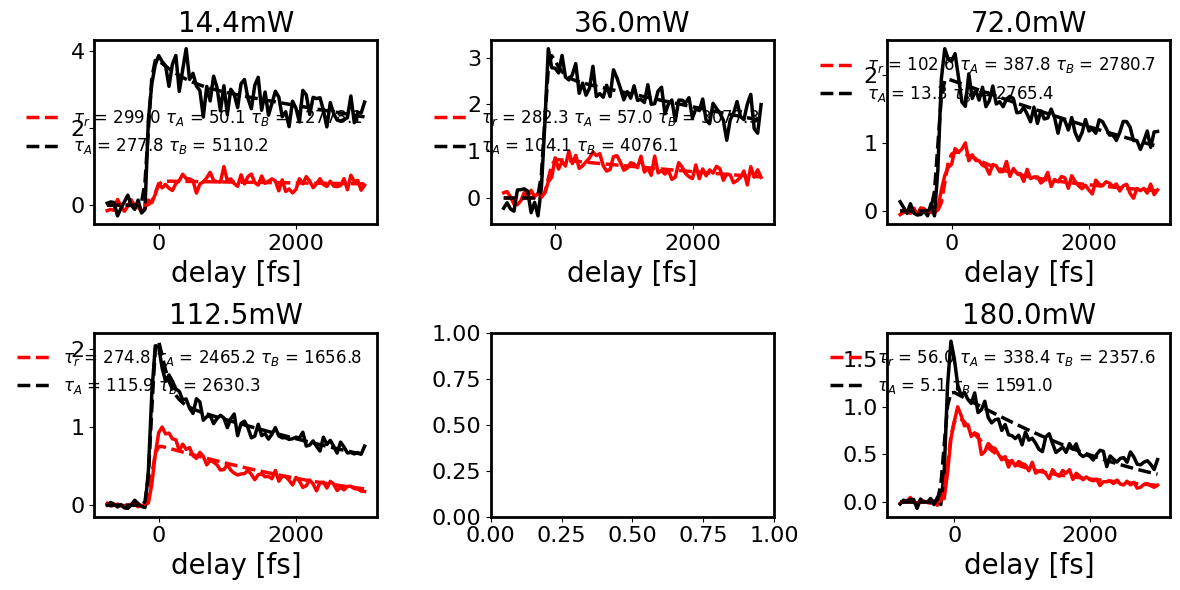

In [156]:
### Attempt Global  multi level fit model
import scipy

def centered_kernel(x, fwhm):
    mean = x.mean()
    return np.exp(-(x-mean)**2/(2*fwhm/2.3548200)**2)

def convolve(arr, kernel):
    """Simple convolution of two arrays."""
    npts = min(arr.size, kernel.size)
    pad = np.ones(npts)
    tmp = np.concatenate((pad*arr[0], arr, pad*arr[-1]))
    out = np.convolve(tmp, kernel/kernel.sum(), mode='valid')
    noff = int((len(out) - npts) / 2)
    return out[noff:noff+npts]

def fit_func(t,A,B,tau_A,tau_B,t_0):
    '''Fit function:
    t: time, array-like
    A,B: amplitudes of the bi-exponential, float
    tau_A/_B: decay times of the bi-exponential, float
    t_0: time zero, position of the heaviside step, float
    returns: fit function, array-like (same shape as t)'''
    
    sig=50/2.3548200
    m=200
    T = np.linspace(-m*sig,m*sig,400)
    H = np.heaviside(t-t_0,0)
    y = A*scipy.special.expit((-(t-t_0)/tau_A))+B*scipy.special.expit(-(t-t_0)/tau_B)
    g = (1/np.sqrt(2*np.pi*sig**2))*np.exp(-T**2/(2*sig**2))
    #g = centered_kernel(T,50)    
    r = convolve(H*y,g)
    return r
            
def fit_func_rise(t,A,B,tau_r,tau_A,tau_B,t_0):
    '''Fit function with rise:
    t: time, array-like
    A: amplitudes of the bi-exponential, float
    tau_r/_A/_B: rise time & decay times , float
    t_0: time zero, position of the heaviside step, float
    returns:
    fit function, array-like (same shape as t)'''
    sig=50/2.3548200
    n=200
    T = np.linspace(-n*sig,n*sig,400)
    H = np.heaviside(t-t_0,0)
    #y = (1-scipy.special.expit(-(t-t_0)/tau_r))*(A*scipy.special.expit(-(t-t_0)/tau_A))+B*scipy.special.expit(-(t-t_0)/tau_B)
    y = (1-scipy.special.expit(-(t-t_0)/tau_r))*(A*scipy.special.expit(-(t-t_0)/tau_A))+B*scipy.special.expit(-(t-t_0)/tau_B)
    g = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-T**2/(2*sig**2))
    #g = centered_kernel(T,50)
    r = convolve(H*y,g)
    return r

#########################

delay_limit, delay_limit_neg = 3000, -700
cmap_max = 0.012

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range
a, aint, a_full = [-12, 15], 20, [-11, 15]

######

p_list_1 = []          #2D list of the fit parameters for 1st trace (E=21.75)
p_list_2 = []          #2D list of the fit parameters for 2nd trace (E=20)
p_errors_list_1 = []   #2D list of the fit parameter covariances for 1st trace (E=21.75)
p_errors_list_2 = []   #2D list of the fit parameter covariances for 2nd trace (E=20)
Am_1 = []              #Amplitude of the fit of Trace 1
Am_2 = []              #Amplitude of the fit of Trace 2
p_cov_list_1 = []
p_cov_list_2 = []
                  #[m,init_tau_A,init_tau_B] for black fit
fit_settings = np.array([[200,100,2000],
                         [200,100,2000],
                         [200,300,2000],
                         [200,60,2000],
                         [200,40,2000],
                         [200,40,2000]])

fig, axx = plt.subplots(2, 3)
fig.set_size_inches(12, 6, forward=False)
axx = axx.flatten()

for s,l in zip(range(len(scans)),power):  #loop over the scans and the fluence simultaniously
    try:
        res_to_plot = vars()[str('res_'+str(scans[s]))]

        ### Calculating traces ###

        trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
        trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

        trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-600,-250)))
        trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-600,-250)))
        
        norm1 = np.max(trace_1)
        trace_1 = trace_1/norm1
        trace_2 = trace_2/norm1

        ### Fitting ###

        I1 = trace_1.values
        t1 = trace_1.coords['delay'].values
        I2 = trace_2.values
        t2 = trace_2.coords['delay'].values
        
        init_tau_r_1=200
        init_tau_A_1=100
        init_tau_B_1=2000    
        t_0_init= -200
        m,init_tau_A_2,init_tau_B_2 = fit_settings[s]   
        
        p_guess_1 = [max(trace_1),max(trace_1),init_tau_r_1,init_tau_A_1,init_tau_B_1,t_0_init] #p = [A,B,tau_1,tau_2,tau_3,t_0]
        p_guess_2 = [max(trace_2),max(trace_2),init_tau_A_2,init_tau_B_2,t_0_init]
        
        param_bounds_1 = ([0,0,0,50,1000,-300],[np.inf,np.inf,300,10000,20000,200])
        param_bounds_2 = ([0,0,0,500,-350], [10,10,500,20000,300])
        p_opt_1,p_cov_1 = curve_fit(fit_func_rise,t1,I1,p0=p_guess_1,bounds=param_bounds_1) #p_opt = [A,B,tau_1,tau_2,t_0]
        p_opt_2,p_cov_2 = curve_fit(fit_func,t2,I2,p0=p_guess_2)
        
        A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1 = p_opt_1
        A_2,B_2,tau_A_2,tau_B_2,t_0_2 = p_opt_2
        
        #print(f'{s} \t A_1: {round(A_1)}',f'tau_A_1: {round(tau_A_1)}')
        #print(f'{s} \t B_1: {round(B_1)}',f'tau_B_1: {round(tau_B_1)}')
        
        #t_1 = np.linspace(min(t1),max(t1),200)
        #t_2 = np.linspace(min(t2),max(t2),200)
        I_1 = fit_func_rise(t1,A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1)
        I_2 = fit_func(t2,A_2,B_2,tau_A_2,tau_B_2,t_0_2)
            
        Am_1.append(max(I_1))
        Am_2.append(max(I_2))
        p_list_1.append(p_opt_1)
        p_list_2.append(p_opt_2[:5])
        p_errors_list_1.append(np.sqrt(np.sum((I_1-I1)**2)))
        p_errors_list_2.append(np.sqrt(np.sum((I_2-I2)**2)))
        p_cov_list_1.append(np.sqrt(np.diag(p_cov_1)))
        p_cov_list_2.append(np.sqrt(np.diag(p_cov_2)))
        #print(f'Scan {s+1}  Values trace 1\n',p_list_1[s])
        #print(f'Scan {s+1}  Errors trace 1\n',p_cov_list_1[s])
        #print(f'Scan {s+1}  Values trace 2\n',p_list_2[s])
        #print(f'Scan {s+1}  Errors trace 2\n',p_cov_list_2[s])
        #print()
        ### Plotting ###
     
        #trace_1.plot(ax=axx[2*s], color = 'red', label = 'E = ' + str(E[0]) + ' eV')
        #trace_2.plot(ax=axx[2*s], color = 'black', label = 'E = ' + str(E[1]) + ' eV')
        #axx[2*s].set_title(str(l)+'mW')
        #axx[2*s].legend(frameon = False)

        axx[s].plot(t1,I1,color = 'red')
        axx[s].plot(t2,I2,color = 'black')
        axx[s].plot(t1,I_1,linestyle='dashed',color = 'red', label = '$\\tau_r$ = ' + str(round(tau_r_1,1))+' $ \\tau_A$ = ' + str(round(tau_A_1,1))+' $\\tau_B$ = ' + str(round(tau_B_1,1)))
        axx[s].plot(t2,I_2,linestyle='dashed',color = 'black', label = '$\\tau_A$ = ' + str(round(tau_A_2,1))+' $ \\tau_B$ = ' + str(round(tau_B_2,1)))
        axx[s].set_title(str(l)+'mW')
        axx[s].set_xlabel('delay [fs]')
        axx[s].legend(frameon = False,loc='best', fontsize = 12)
        
    except RuntimeError:          #incase of runtime error the loop will not be terminated
        print(f'Dataset {s+1}: Fitparameters could not be determined.')
        #aaa = 1
    
fig.tight_layout()
plt.show()

#########################

p_list_1 = np.array(p_list_1)
p_list_2 = np.array(p_list_2)
Am_1 = np.array(Am_1)
Am_2 = np.array(Am_2)
p_errors_list_1 = np.array(p_errors_list_1)
p_errors_list_2 = np.array(p_errors_list_2)
p_cov_list_1 = np.array(p_cov_list_1)
p_cov_list_2 = np.array(p_cov_list_2)

with convolution, exp rise only for trace 1 (E=21.75eV, red)


/Users/lawsonlloyd/.pyenv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/lawsonlloyd/.pyenv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/lawsonlloyd/.pyenv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/f3/xrt6qd790rv6qc6bwc24py7m0000gn/T/ipykernel_4001/2044265647.py:110: RuntimeWarning: overflow encountered in exp
  y = (1-np.exp(-(t-t_0)/tau_r))*(A*np.exp(-(t-t_0)/tau_A)+B*np.exp(-(t-t_0)/tau_B))
/var/folders/f3/xrt6qd790rv6qc6bwc24py7m0000gn/T/ipykernel_4001/2044265647.py:113: RuntimeWarning: in

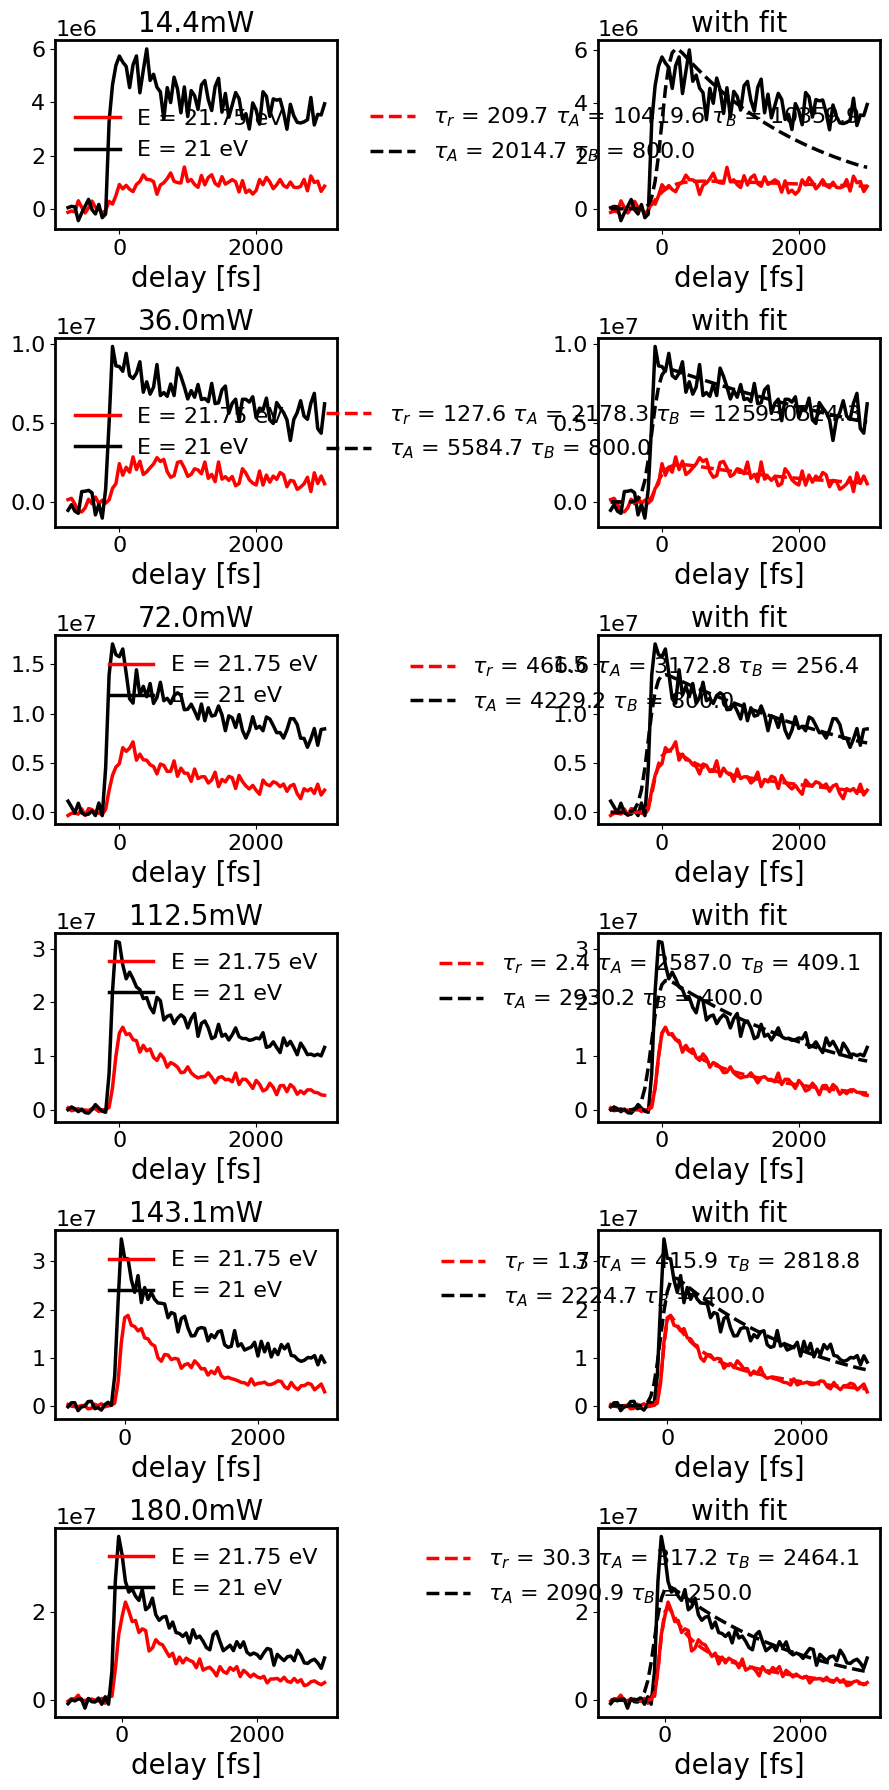

In [252]:

fitmodel = 'with convolution, exp rise only for trace 1 (E=21.75eV, red)'
print(fitmodel)

def centered_kernel(x, fwhm):
    mean = x.mean()
    return np.exp(-(x-mean)**2/(2*fwhm/2.3548200)**2)

def convolve(arr, kernel):
    """Simple convolution of two arrays."""
    npts = min(arr.size, kernel.size)
    pad = np.ones(npts)
    tmp = np.concatenate((pad*arr[0], arr, pad*arr[-1]))
    out = np.convolve(tmp, kernel/kernel.sum(), mode='valid')
    noff = int((len(out) - npts) / 2)
    return out[noff:noff+npts]

#########################

delay_limit, delay_limit_neg = 3000, -800
cmap_max = 0.012

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range

a, aint, a_full = [-12, 15], 20, [-11, 15]

######

p_list_1 = []          #2D list of the fit parameters for 1st trace (E=21.75)
p_list_2 = []          #2D list of the fit parameters for 2nd trace (E=20)
p_errors_list_1 = []   #2D list of the fit parameter covariances for 1st trace (E=21.75)
p_errors_list_2 = []   #2D list of the fit parameter covariances for 2nd trace (E=20)
Am_1 = []              #Amplitude of the fit of Trace 1
Am_2 = []              #Amplitude of the fit of Trace 2
p_cov_list_1 = []
p_cov_list_2 = []

fig, axx = plt.subplots(len(scans), 2, width_ratios=[1, 1])
fig.set_size_inches(9, 18, forward=False)
axx = axx.flatten()

                  #[m,init_tau_A,init_tau_B] for black fit
fit_settings = np.array([[150,800,800],
                         [200,800,800],
                         [200,800,800],
                         [150,200,400],
                         [150,200,400],
                         [200,200,250]])

for s,l in zip(range(len(scans)),power):  #loop over the scans and the fluence simultaniously
    try:
        res_to_plot = vars()[str('res_'+str(scans[s]))]

        ### Calculating traces ###

        trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
        trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

        trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-500,-200)))
        trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-500,-200)))
        #trace_1 = trace_1/np.max(trace_1)
        #trace_2 = trace_2/np.max(trace_2)

        ### Fitting ###

        I1 = trace_1.values
        t1 = trace_1.coords['delay'].values
        I2 = trace_2.values
        t2 = trace_2.coords['delay'].values
        
        m,init_tau_A_2,init_tau_B_2 = fit_settings[s]   
        init_tau_r_1=400
        init_tau_A_1=800
        init_tau_B_1=800    
        t_0_init=-100
        
        p_guess_1 = [max(trace_1),max(trace_1),init_tau_r_1,init_tau_A_1,init_tau_B_1,t_0_init] #p = [A,B,tau_1,tau_2,tau_3,t_0]
        p_guess_2 = [max(trace_2),max(trace_2),init_tau_A_2,init_tau_B_2,t_0_init]
        
        
        def fit_func(t,A,B,tau_A,tau_B,t_0):
            '''Fit function:
            t: time, array-like
            A,B: amplitudes of the bi-exponential, float
            tau_A/_B: decay times of the bi-exponential, float
            t_0: time zero, position of the heaviside step, float
            returns:
            fit function, array-like (same shape as t)'''
            sig=50/2.3548200
            m=100
            T = np.linspace(-m*sig,m*sig,400)
            H = np.heaviside(t-t_0,0)
            y = A*np.exp(-(t-t_0)/tau_A)#+B*np.exp(-(t-t_0)/tau_B)
            g = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-T**2/(2*sig**2))
            #g = centered_kernel(T,50)
            r = convolve(H*y,g)
            return r
        
        def fit_func_rise(t,A,B,tau_r,tau_A,tau_B,t_0):
            '''Fit function with rise:
            t: time, array-like
            A: amplitudes of the bi-exponential, float
            tau_r/_A/_B: rise time & decay times , float
            t_0: time zero, position of the heaviside step, float
            returns:
            fit function, array-like (same shape as t)'''
            sig=50/2.3548200
            n=200
            T = np.linspace(-n*sig,n*sig,400)
            H = np.heaviside(t-t_0,0)
            y = (1-np.exp(-(t-t_0)/tau_r))*(A*np.exp(-(t-t_0)/tau_A)+B*np.exp(-(t-t_0)/tau_B))
            g = 1/np.sqrt(2*np.pi*sig**2)*np.exp(-T**2/(2*sig**2))
            #g = centered_kernel(T,50)
            r = convolve(H*y,g)
            return r
        
        #param_bounds_1 = ([-np.inf,-np.inf,0,0,1000,-250],[np.inf,np.inf,np.inf,np.inf,4000,100])
        p_opt_1,p_cov_1 = curve_fit(fit_func_rise,t1,I1,p0=p_guess_1)#,bounds=param_bounds_1) #p_opt = [A,B,tau_1,tau_2,t_0]
        p_opt_2,p_cov_2 = curve_fit(fit_func,t2,I2,p0=p_guess_2)
        
        A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1 = p_opt_1
        A_2,B_2,tau_A_2,tau_B_2,t_0_2 = p_opt_2
        
        #print(f'{s} \t A_1: {round(A_1)}',f'tau_A_1: {round(tau_A_1)}')
        #print(f'{s} \t B_1: {round(B_1)}',f'tau_B_1: {round(tau_B_1)}')
        
        #t_1 = np.linspace(min(t1),max(t1),200)
        #t_2 = np.linspace(min(t2),max(t2),200)
        I_1 = fit_func_rise(t1,A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1)
        I_2 = fit_func(t2,A_2,B_2,tau_A_2,tau_B_2,t_0_2)
            
        Am_1.append(max(I_1))
        Am_2.append(max(I_2))
        p_list_1.append(p_opt_1)
        p_list_2.append(p_opt_2[:5])
        p_errors_list_1.append(np.sqrt(np.sum((I_1-I1)**2)))
        p_errors_list_2.append(np.sqrt(np.sum((I_2-I2)**2)))
        p_cov_list_1.append(np.sqrt(np.diag(p_cov_1)))
        p_cov_list_2.append(np.sqrt(np.diag(p_cov_2)))
        #print(f'Scan {s+1}  Values trace 1\n',p_list_1[s])
        #print(f'Scan {s+1}  Errors trace 1\n',p_cov_list_1[s])
        #print(f'Scan {s+1}  Values trace 2\n',p_list_2[s])
        #print(f'Scan {s+1}  Errors trace 2\n',p_cov_list_2[s])
        #print()
        ### Plotting ###
     
        trace_1.plot(ax=axx[2*s], color = 'red', label = 'E = ' + str(E[0]) + ' eV')
        trace_2.plot(ax=axx[2*s], color = 'black', label = 'E = ' + str(E[1]) + ' eV')
        axx[2*s].set_title(str(l)+'mW')
        axx[2*s].legend(frameon = False)

        axx[2*s+1].plot(t1,I1,color = 'red')
        axx[2*s+1].plot(t2,I2,color = 'black')
        axx[2*s+1].plot(t1,I_1,linestyle='dashed',color = 'red', label = '$\\tau_r$ = ' + str(round(tau_r_1,1))+' $ \\tau_A$ = ' + str(round(tau_A_1,1))+' $\\tau_B$ = ' + str(round(tau_B_1,1)))
        axx[2*s+1].plot(t2,I_2,linestyle='dashed',color = 'black', label = '$\\tau_A$ = ' + str(round(tau_A_2,1))+' $ \\tau_B$ = ' + str(round(tau_B_2,1)))
        axx[2*s+1].set_title('with fit')
        axx[2*s+1].set_xlabel('delay [fs]')
        axx[2*s+1].legend(frameon = False,loc='best')
        
    except RuntimeError:          #incase of runtime error the loop will not be terminated
        print(f'Dataset {s+1}: Fitparameters could not be determined.')
        
    
fig.tight_layout() 

#########################

p_list_1 = np.array(p_list_1)
p_list_2 = np.array(p_list_2)
Am_1 = np.array(Am_1)
Am_2 = np.array(Am_2)
p_errors_list_1 = np.array(p_errors_list_1)
p_errors_list_2 = np.array(p_errors_list_2)
p_cov_list_1 = np.array(p_cov_list_1)
p_cov_list_2 = np.array(p_cov_list_2)

In [ ]:
fitmodel = 'without convolution, exp rise also for trace 2 (E=21eV, black)'
print(fitmodel)

#########################
delay_limit, delay_limit_neg = 3000, -800
cmap_max = 0.012

E, Eint = [21.75, 21], 0.05 # center energies, half of full E integration range

a, aint, a_full = [-12, 15], 20, [-11, 15]

######

p_list_1 = []   #2D list of the fit parameters for 1st trace (E=21.75)
p_list_2 = []   #2D list of the fit parameters for 2nd trace (E=20)
p_errors_list_1 = []   #2D list of the fit parameter covariances for 1st trace (E=21.75)
p_errors_list_2 = []   #2D list of the fit parameter covariances for 2nd trace (E=20)
Am_1 = []
Am_2 = []
p_cov_list_1 = []
p_cov_list_2 = []


fig, axx = plt.subplots(len(scans), 2, width_ratios=[1, 1])
fig.set_size_inches(9, 18, forward=False)
axx = axx.flatten()

fit_settings = np.array([[150,800,800],
                         [200,800,800],
                         [200,400,800],
                         [150,200,400],
                         [150,200,400],
                         [200,200,250],
                         [200,200,250]])


for s,l in zip(range(len(scans)),power):  #loop over the scans and the fluence simultaniously
    try:
        res_to_plot = vars()[str('res_'+str(scans[s]))]

        ### Calculating traces

        trace_1 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[0]-Eint, E[0]+Eint)).sum(axis=(0,1))
        trace_2 = res_to_plot.sel(Angle = slice(a[0],a[1]), Ekin = slice(E[1]-Eint, E[1]+Eint)).sum(axis=(0,1))

        trace_1 = trace_1-np.mean(trace_1.sel(delay =slice(-500,-200)))
        trace_2 = trace_2-np.mean(trace_2.sel(delay =slice(-500,-200)))
        #trace_1 = trace_1/np.max(trace_1)
        #trace_2 = trace_2/np.max(trace_2)

        ### Fitting

        I1 = trace_1.values
        t1 = trace_1.coords['delay'].values
        I2 = trace_2.values
        t2 = trace_2.coords['delay'].values
        
        m,u1,u2=fit_settings[s]
        ur=50  
        ur_=400
        u1_=800
        u2_=800    
        t_0_init=-100
        
        p_guess_1 = [max(trace_1)/2,max(trace_1)/2,ur_,u1_,u2_,t_0_init] #p = [A,B,tau_r,tau_A,tau_B,t_0]
        p_guess_2 = [max(trace_2)/2,max(trace_2)/2,ur,u1,u2,t_0_init]
        
        
        def fit_func(t,A,B,tau_A,tau_B,t_0):
            '''Fit function:
            t: time, array-like
            A,B: amplitudes of the bi-exponential, float
            tau_A/_B: decay times of the bi-exponential, float
            t_0: time zero, position of the heaviside step, float
            returns:
            fit function, array-like (same shape as t)'''
            H = np.heaviside(t-t_0,0)
            y = A*np.exp(-(t-t_0)/tau_A)+B*np.exp(-(t-t_0)/tau_B)
            r=H*y
            return r
        
        def fit_func_rise(t,A,B,tau_r,tau_A,tau_B,t_0):
            '''Fit function:
            t: time, array-like
            A: amplitudes of the bi-exponential, float
            tau_r/_A/_B: rise time & decay times , float
            t_0: time zero, position of the heaviside step, float
            returns:
            fit function, array-like (same shape as t)'''
            H = np.heaviside(t-t_0,0)
            y = (1-np.exp(-(t-t_0)/tau_r))*(A*np.exp(-(t-t_0)/tau_A)+B*np.exp(-(t-t_0)/tau_B))
            r = H*y
            return r
        
        param_bounds_1 = ([-np.inf,-np.inf,0,0,700,-250],[np.inf,np.inf,400,np.inf,np.inf,100])
        p_opt_1,p_cov_1 = curve_fit(fit_func_rise,t1,I1,p0=p_guess_1,bounds=param_bounds_1)
        p_opt_2,p_cov_2 = curve_fit(fit_func_rise,t2,I2,p0=p_guess_2)
        
        A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1 = p_opt_1
        A_2,B_2,tau_r_2,tau_A_2,tau_B_2,t_0_2 = p_opt_2
        
        #print(f'{s} \t A_1: {round(A_1)}',f'tau_A_1: {round(tau_A_1)} \t tau_r_1: {tau_r_1}')
        #print(f'{s} \t B_1: {round(B_1)}',f'tau_B_1: {round(tau_B_1)}')
        
        
        
        I_1 = fit_func_rise(t1,A_1,B_1,tau_r_1,tau_A_1,tau_B_1,t_0_1)
        I_2 = fit_func_rise(t2,A_2,B_2,tau_r_2,tau_A_2,tau_B_2,t_0_2)
        
        Am_1.append(max(I_1))
        Am_2.append(max(I_2))
        p_list_1.append(p_opt_1)
        p_list_2.append(p_opt_2[[0,1,3,4,5,-1]])
        p_errors_list_1.append(np.sqrt(np.sum((I_1-I1)**2)))
        p_errors_list_2.append(np.sqrt(np.sum((I_2-I2)**2)))
        p_cov_list_1.append(np.sqrt(np.diag(p_cov_1)))
        p_cov_list_2.append(np.sqrt(np.diag(p_cov_2)))
        
        print(f'Scan {s+1}  Values trace 1\n',p_list_1[s])
        print(f'Scan {s+1}  Errors trace 1\n',p_cov_list_1[s])
        print(f'Scan {s+1}  Values trace 2\n',p_list_2[s])
        print(f'Scan {s+1}  Errors trace 2\n',p_cov_list_2[s])
        print()
        
        ### Plotting ###
        
        trace_1.plot(ax=axx[2*s], color = 'red', label = 'E = ' + str(E[0]) + ' eV')
        trace_2.plot(ax=axx[2*s], color = 'black', label = 'E = ' + str(E[1]) + ' eV')
        axx[2*s].set_title(str(l)+'mW')
        axx[2*s].legend(frameon = False)

        axx[2*s+1].plot(t1,I1,color = 'red')
        axx[2*s+1].plot(t2,I2,color = 'black')
        axx[2*s+1].plot(t1,I_1,linestyle='dashed',color = 'red')
        axx[2*s+1].plot(t2,I_2,linestyle='dashed',color = 'black')
        axx[2*s+1].set_title((str(l)+'mW with fit'))
        axx[2*s+1].set_xlabel('delay [fs]')
        #axx[2*s+1].legend(frameon = False,loc='best')
        
    except RuntimeError:          #incase of runtime error the loop will not be terminated
        print(f'Dataset {s+1}: Fitparameters could not be determined.')
        
    
fig.tight_layout()   

#########################


p_list_1 = np.array(p_list_1)
p_list_2 = np.array(p_list_2)
Am_1 = np.array(Am_1)
Am_2 = np.array(Am_2)
p_errors_list_1 = np.array(p_errors_list_1)
p_errors_list_2 = np.array(p_errors_list_2)
p_cov_list_1 = np.array(p_cov_list_1)
p_cov_list_2 = np.array(p_cov_list_2)

##Plot of the amplitudes in dependence of fluence

with convolution, exp rise only for trace 1 (E=21.75eV, red)


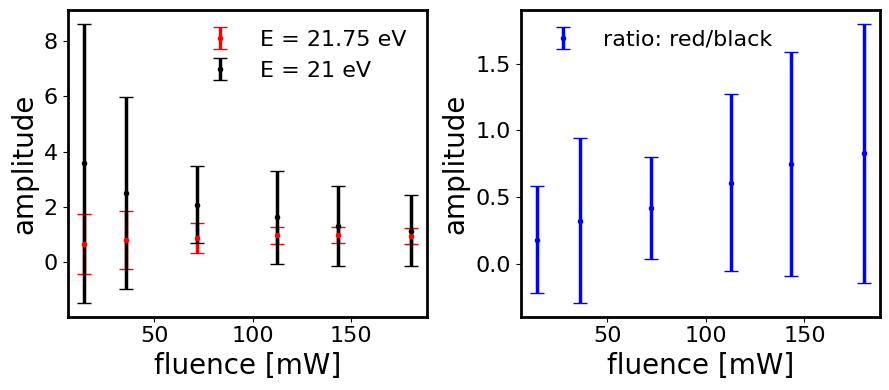

In [130]:
print(fitmodel) #indicator to see which of the above cells were executed last -> which fitmodel is used

#= [A,B,tau_1,tau_2,t_0]
#Am_2 = p_list_1[:,0]+p_list_1[:,1] ????

sc = 1 #error scale
error = sc*np.sqrt((p_errors_list_1/Am_2)**2+(p_errors_list_2*Am_1/Am_2**2)**2)

fig, ax = plt.subplots(1, 2, width_ratios=[1, 1])
fig.set_size_inches(9, 4, forward=False)
ax = ax.flatten()

ax[0].errorbar(power,Am_1,yerr=sc*p_errors_list_1,color='red',fmt='.',capthick=1,capsize=5, label = 'E = ' + str(E[0]) + ' eV')
ax[0].errorbar(power,Am_2,yerr=sc*p_errors_list_2,color='black',fmt='.',capthick=1,capsize=5, label = 'E = ' + str(E[1]) + ' eV')
ax[0].legend(loc='best', frameon=False)
ax[0].set_xlabel('fluence [mW]')
ax[0].set_ylabel('amplitude')

ax[1].errorbar(power,Am_1/Am_2,yerr=error,color='blue',fmt='.',capthick=1,capsize=5, label = 'ratio: red/black')
ax[1].legend(loc='best', frameon=False)
ax[1].set_xlabel('fluence [mW]')
ax[1].set_ylabel('amplitude')

fig.tight_layout()   

## Plot of the Parameters A and B

with convolution, exp rise only for trace 1 (E=21.75eV, red)


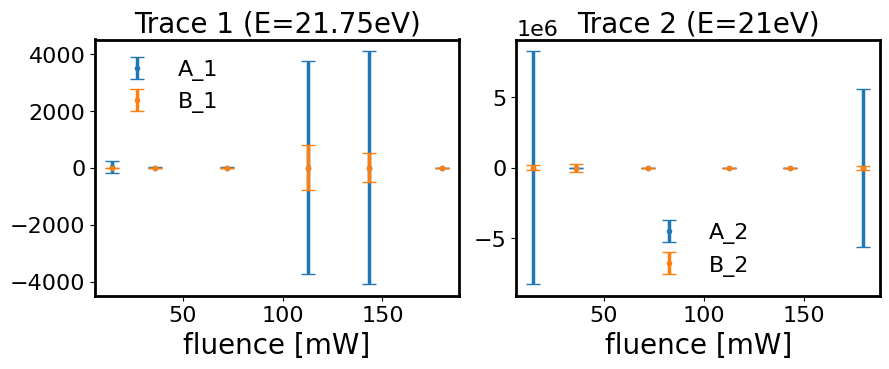

In [131]:
print(fitmodel) #indicator to see which of the above cells were executed last -> which fitmodel is used

fig, ax = plt.subplots(1, 2, width_ratios=[1, 1])
fig.set_size_inches(9, 4, forward=False)
ax = ax.flatten()

ax[0].errorbar(power,p_list_1[:,0],yerr=p_cov_list_1[:,0],fmt='.',capthick=1,capsize=5,label='A_1')
ax[0].errorbar(power,p_list_1[:,1],yerr=p_cov_list_1[:,1],fmt='.',capthick=1,capsize=5,label='B_1')
ax[0].set_xlabel('fluence [mW]')
ax[0].set_title('Trace 1 (E=21.75eV)')
ax[0].legend(loc='best', frameon=False)

ax[1].errorbar(power,p_list_2[:,0],yerr=p_cov_list_2[:,0],fmt='.',capthick=1,capsize=5,label='A_2')
ax[1].errorbar(power,p_list_2[:,1],yerr=p_cov_list_2[:,1],fmt='.',capthick=1,capsize=5,label='B_2')
ax[1].set_xlabel('fluence [mW]')
ax[1].set_title('Trace 2 (E=21eV)')
ax[1].legend(loc='best', frameon=False)
fig.tight_layout() 

**Plot of rise- and falltimes in dependence of fluence**

with convolution, exp rise only for trace 1 (E=21.75eV, red)


(-1000.0, 1000.0)

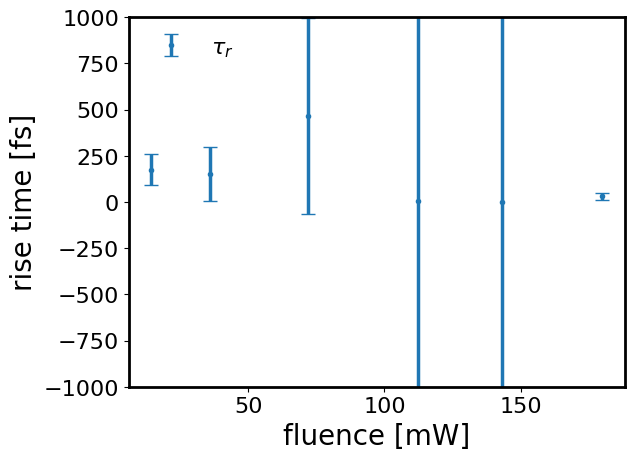

In [132]:
print(fitmodel) #indicator to see which of the above cells were executed last -> which fitmodel is used

### rise-time tau_r of red trace ###

rise_time_1 = p_list_1[:,2]
rise_time_error = p_cov_list_1[:,2]
sc = 1
fig,ax=plt.subplots()
ax.errorbar(power,rise_time_1,yerr=sc*rise_time_error,fmt='.',capthick=1,capsize=5, label = '$\\tau_r$')#time zero of the red signal minus time zero of the black signal
#ax.plot(power,fall_time_1,label = 'tau_2')
#ax.plot(power,fall_time_2, label = 'tau_3')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('fluence [mW]')
ax.set_ylabel('rise time [fs]')
ax.set_ylim([-1000,1000])

**Plot of time zero in dependence of fluence**

with convolution, exp rise only for trace 1 (E=21.75eV, red)


(-200.0, 1000.0)

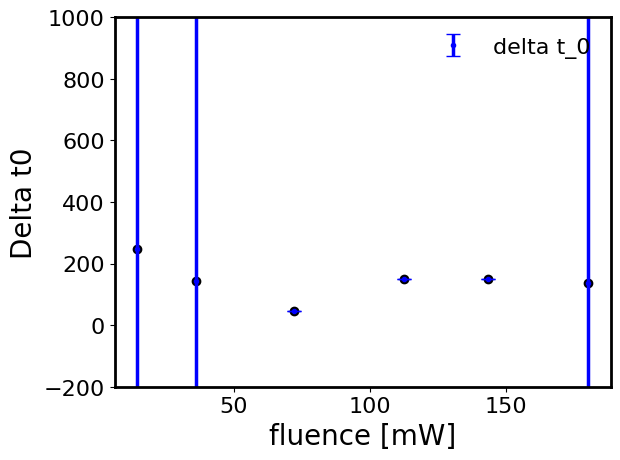

In [133]:
print(fitmodel) #indicator to see which of the above cells were executed last -> which fitmodel is used

time_zero_1 = p_list_1[:,-1]
time_zero_2 = p_list_2[:,-1]
t_0_err = np.sqrt((p_cov_list_2[:,-1])**2)

fig,ax=plt.subplots()
ax.errorbar(power,time_zero_1-time_zero_2,yerr=t_0_err,fmt='.',capthick=1,capsize=5,color='blue', label = 'delta t_0')#time zero of the red signal minus time zero of the black signal
ax.scatter(power,time_zero_1-time_zero_2, color = 'black')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('fluence [mW]')
ax.set_ylabel('Delta t0')
ax.set_ylim([-200,1000])